
# 1 Importing 


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load Dataset

In [66]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\vehicle_price_prediction\Vehicle Price Prediction\dataset.csv")
print("Shape:", df.shape)
df.head()

Shape: (1002, 17)


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


# Data Preprocessing

In [69]:
df.drop_duplicates(inplace=True)

In [71]:
# Remove rows with missing price or mileage
df = df[df['price'].notna() & df['mileage'].notna()]

In [73]:
# Remove rows with price = 0
df = df[df['price'] > 100]

In [75]:
# Fill missing values
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)
df['fuel'].fillna('Unknown', inplace=True)
df['transmission'].fillna('Unknown', inplace=True)
df['trim'].fillna('Unknown', inplace=True)
df['body'].fillna('Unknown', inplace=True)
df['drivetrain'].fillna('Unknown', inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23832\1137455672.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23832\1137455672.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [77]:
# Drop unhelpful columns
df.drop(['description', 'engine', 'interior_color', 'exterior_color'], axis=1, inplace=True)

In [79]:
df['vehicle_age'] = 2025 - df['year']
df.drop('year', axis=1, inplace=True)

# Keep only top makes & models to reduce dimensionality
top_makes = df['make'].value_counts().nlargest(20).index
df = df[df['make'].isin(top_makes)]

top_models = df['model'].value_counts().nlargest(50).index
df = df[df['model'].isin(top_models)]


# EDA

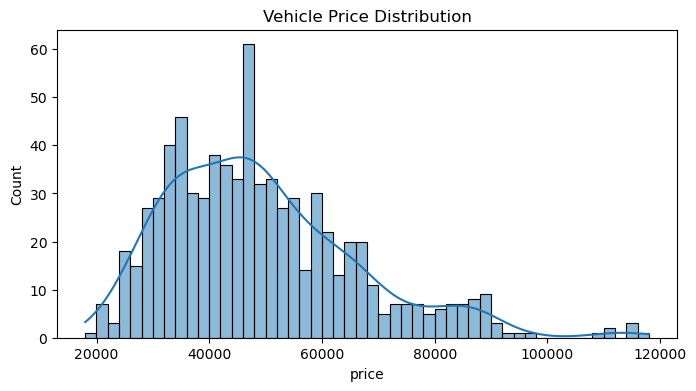

In [82]:
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Vehicle Price Distribution")
plt.show()



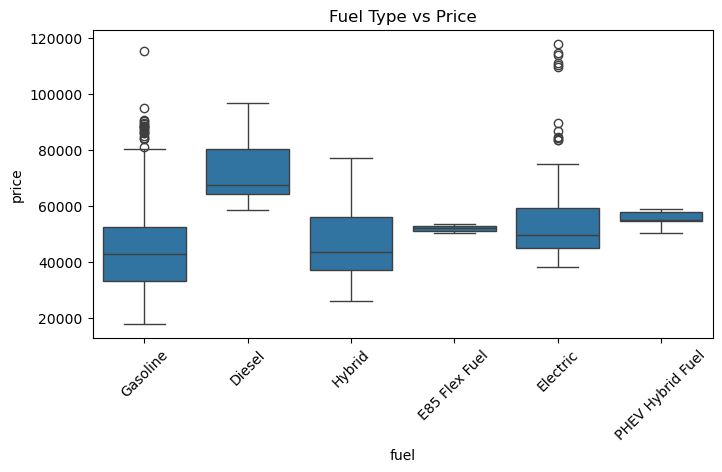

In [85]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='fuel', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Fuel Type vs Price")
plt.show()


#  Prepare Features & Target

In [88]:

X = df.drop(['price', 'name'], axis=1)
y = df['price']

# Define categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [90]:
# Preprocessing + Model Pipeline

In [92]:


cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('cat', cat_transformer, categorical_cols)
], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

#  Train/Test Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  Train Model

In [98]:
model.fit(X_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make', 'model', 'fuel',
                                                   'transmission', 'trim',
                                                   'body', 'drivetrain'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

 # Evaluate Model



RMSE: 4808.04
R² Score: 0.91


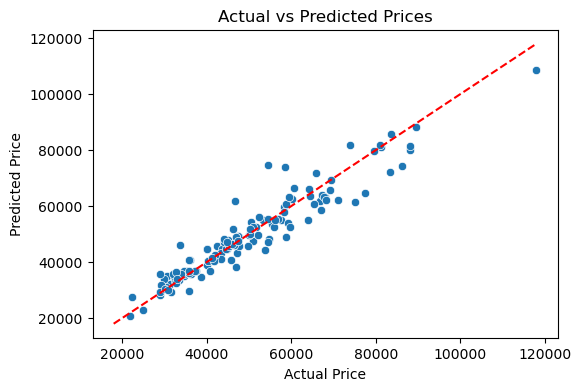

In [101]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 2))

# Residual plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()